In [1]:
# import libraries used for empirical analysis
import matplotlib.pyplot as plt
import numpy as np 
from timeit import Timer

# import alogrithms used in the project
from kmp import kmpStringMatcher
from naive import naiveStringMatcher

In [2]:
# open the dna sequence file and clean it by removing unnecessary lines and '\n' characters
fnaFile = open('GCF_000023605.1_ASM2360v1_genomic.fna')
dnaSequence = ''.join(fnaFile.readlines()[1:])
dnaSequence = dnaSequence.replace('\n', '')

In [3]:
# we will be doing an empirical analysis by fixing the pattern to be searched 
# in this case, the pattern to be searched is 'ATCAGGCTA'
# we will vary the length of the text which the pattern will need to be searched in 
# by splitting the DNA sequence string into 20 different lengths

# we will run the search process for 10 times for each length of text 
NUM_OF_TIMES = 10

pattern = 'ATCAGGCTA'

increment = len(dnaSequence) // 20
lengthsOfText = []
for i in range(1, 21):
    if i == 20:
        lengthsOfText.append(len(dnaSequence))
    else:
        lengthsOfText.append(i * increment)

In [4]:
# analysis for Naive (Brute-Force) algorithm

# run the search process for 10 times, then take the average, for each length of text
naiveExecutionTimes = []
for idx, length in enumerate(lengthsOfText):
    t = Timer(lambda: naiveStringMatcher(dnaSequence[:length], pattern)) 
    executionTime = t.timeit(number=NUM_OF_TIMES) / NUM_OF_TIMES
    
    print("Length of text: " + str(length) + ", Average Execution Time: " + str(executionTime))
    
    naiveExecutionTimes.append(executionTime)

Length of text: 243145, Average Execution Time: 0.08273899650000001
Length of text: 486290, Average Execution Time: 0.16880083510000005
Length of text: 729435, Average Execution Time: 0.2535511381000001
Length of text: 972580, Average Execution Time: 0.3356010727000001
Length of text: 1215725, Average Execution Time: 0.41557482060000017
Length of text: 1458870, Average Execution Time: 0.4863852816999998
Length of text: 1702015, Average Execution Time: 0.5877350616000001
Length of text: 1945160, Average Execution Time: 0.6847493904
Length of text: 2188305, Average Execution Time: 0.7560391811999999
Length of text: 2431450, Average Execution Time: 0.8284669477000002
Length of text: 2674595, Average Execution Time: 0.9319799580999998
Length of text: 2917740, Average Execution Time: 0.9716780515000003
Length of text: 3160885, Average Execution Time: 1.0769965130000003
Length of text: 3404030, Average Execution Time: 1.1270448979000007
Length of text: 3647175, Average Execution Time: 1.1983

In [5]:
# analysis for Knuth-Morris-Pratt (KMP) algorithm

# run the search process for 10 times, then take the average, for each length of text
kmpExecutionTimes = []
for idx, length in enumerate(lengthsOfText):
    t = Timer(lambda: kmpStringMatcher(dnaSequence[:length], pattern)) 
    executionTime = t.timeit(number=NUM_OF_TIMES) / NUM_OF_TIMES
    
    print("Length of text: " + str(length) + ", Average Execution Time: " + str(executionTime))
    
    kmpExecutionTimes.append(executionTime)

Length of text: 243145, Average Execution Time: 0.0502332335999995
Length of text: 486290, Average Execution Time: 0.10096340030000021
Length of text: 729435, Average Execution Time: 0.1511901457999983
Length of text: 972580, Average Execution Time: 0.19857125349999763
Length of text: 1215725, Average Execution Time: 0.24756364309999981
Length of text: 1458870, Average Execution Time: 0.2914525228000002
Length of text: 1702015, Average Execution Time: 0.3411311318999992
Length of text: 1945160, Average Execution Time: 0.3923885618999975
Length of text: 2188305, Average Execution Time: 0.4556407815
Length of text: 2431450, Average Execution Time: 0.4987185894999982
Length of text: 2674595, Average Execution Time: 0.5345001433999983
Length of text: 2917740, Average Execution Time: 0.5712246258000022
Length of text: 3160885, Average Execution Time: 0.6389760119999977
Length of text: 3404030, Average Execution Time: 0.6913370952999998
Length of text: 3647175, Average Execution Time: 0.7482

Text(0, 0.5, 'Execution Times (s)')

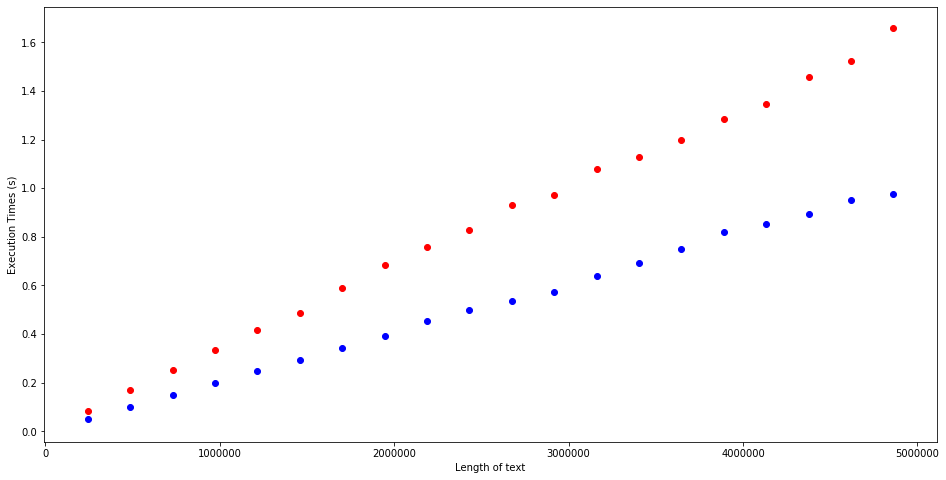

In [6]:
# plot the execution time against length of text for both KMP and Naive

f, ax = plt.subplots(figsize=(16, 8))
plt.scatter(lengthsOfText, naiveExecutionTimes, color='red')
plt.scatter(lengthsOfText, kmpExecutionTimes, color='blue')

plt.xlabel('Length of text')
plt.ylabel('Execution Times (s)')

In [ ]:
# not yet completed
def rabin_karp_string_matcher(text, pattern):
    indexes = []
    m = len(pattern)
    n = len(text)
    d = 26
    p = 5381
    
    # compute hash value for the pattern
    patternHash = 0
    for i in range(0, m):
        patternHash += (ord(pattern[i]) - ord('A') + 1) * d ** (m - 1 - i)
    patternHash = patternHash % p
    
    # compute hash value for first window
    windowHash = 0
    for i in range(0, m):
        windowHash += (ord(text[i]) - ord('A') + 1) * d ** (m - 1 - i)
    windowHash = windowHash % p
    
    for i in range(0, n - m + 1):
        if windowHash == patternHash:
            for j in range(0, m):
                if pattern[j] == text[i + j]:
                    if j == m - 1:
                        indexes.append(i)
                else:
                    break
        else:
            windowHash = (((windowHash - (ord(text[i]) - ord('A') + 1) * d ** (m - 1) % p) * d) % p + (ord(text[i + m]) - ord('A') + 1)) % p
            
    return indexes

In [ ]:
rabin_karp_string_matcher("ABCDEFGABCDABCDBBBCBDBEWRERBB", "ABCD")